In [1]:
import pandas as pd

/Users/wooxoo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# 读取合并后的数据
df_merged = pd.read_csv('merged.csv', parse_dates=['decision_date', 'sentiment_date'])


# 查看前几行数据，确认数据加载正确
print(df_merged.head())


  decision_date  rate_change   decision sentiment_date  sentiment  \
0    1996-11-13         0.00  No Change     1996-10-30   0.028881   
1    1996-12-17         0.00  No Change     1996-12-04  -0.588398   
2    1997-02-05         0.00  No Change     1997-01-22   0.123663   
3    1997-03-25         0.25   Increase     1997-03-12  -0.728463   
4    1997-05-20         0.00  No Change     1997-05-07  -0.035630   

                                      sentiment_dict  days_difference  
0  {'positive': 0.1624157875776291, 'negative': 0...               14  
1  {'positive': 0.07799529284238815, 'negative': ...               13  
2  {'positive': 0.17666494846343994, 'negative': ...               14  
3  {'positive': 0.02856595441699028, 'negative': ...               13  
4  {'positive': 0.16252721846103668, 'negative': ...               13  


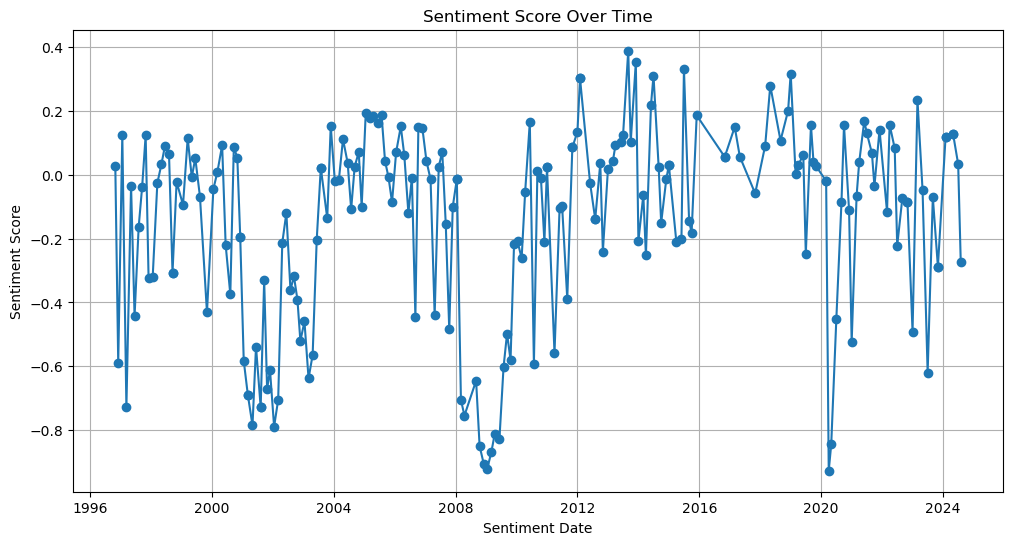

In [5]:
import matplotlib.pyplot as plt

# 绘制情感得分随时间的变化
plt.figure(figsize=(12,6))
plt.plot(df_merged['sentiment_date'], df_merged['sentiment'], marker='o')
plt.title('Sentiment Score Over Time')
plt.xlabel('Sentiment Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

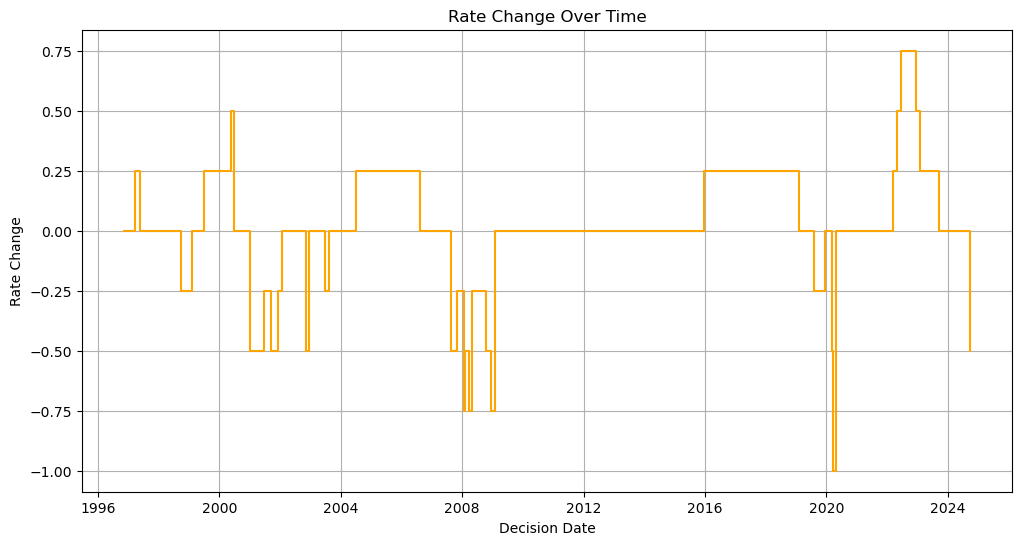

In [7]:
# 绘制利率变动随时间的变化

plt.figure(figsize=(12,6))
plt.step(df_merged['decision_date'], df_merged['rate_change'], where='post', label='Rate Change', color='orange')
plt.title('Rate Change Over Time')
plt.xlabel('Decision Date')
plt.ylabel('Rate Change')
plt.grid(True)
plt.show()


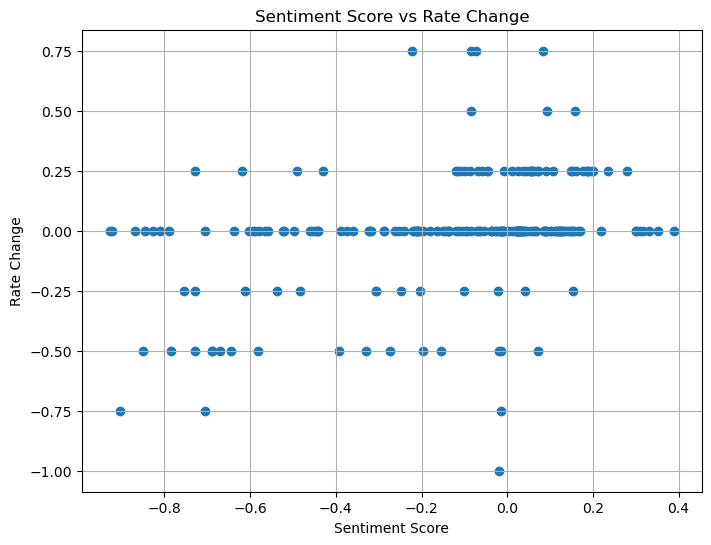

In [9]:
# 分析情感得分与利率变动的关系
# 绘制散点图
plt.figure(figsize=(8,6))
plt.scatter(df_merged['sentiment'], df_merged['rate_change'])
plt.title('Sentiment Score vs Rate Change')
plt.xlabel('Sentiment Score')
plt.ylabel('Rate Change')
plt.grid(True)
plt.show()


In [10]:
# 计算情感得分与利率变动之间的皮尔逊相关系数，量化两者的线性关系
correlation = df_merged['sentiment'].corr(df_merged['rate_change'])
print(f"Correlation between sentiment score and rate change: {correlation}")


Correlation between sentiment score and rate change: 0.35143761007657887


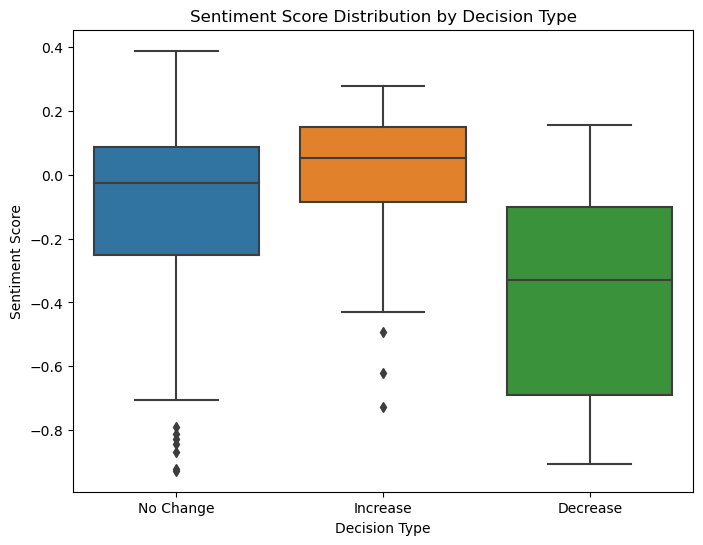

In [11]:
# 分析情感得分与利率决策类型的关系
# 如果 decision 列存在，且表示利率决策类型（如 'Increase'、'Decrease'、'No Change'），可以分析不同决策类型下情感得分的分布
# 比较不同利率决策类型下情感得分的分布，观察是否存在明显差异。

import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='decision', y='sentiment', data=df_merged)
plt.title('Sentiment Score Distribution by Decision Type')
plt.xlabel('Decision Type')
plt.ylabel('Sentiment Score')
plt.show()


In [13]:
# 检验不同决策类型下，情感得分的均值是否存在显著差异

from scipy.stats import f_oneway

# 分组情感得分
increase = df_merged[df_merged['decision'] == 'Increase']['sentiment']
decrease = df_merged[df_merged['decision'] == 'Decrease']['sentiment']
no_change = df_merged[df_merged['decision'] == 'No Change']['sentiment']

# 执行单因素方差分析
F_statistic, p_value = f_oneway(increase, decrease, no_change)
print(f"ANOVA F-statistic: {F_statistic}, p-value: {p_value}")


ANOVA F-statistic: 17.85987936956136, p-value: 7.120102074116469e-08


In [14]:
# 时间序列分析
# 创建滞后变量以分析过去的情感得分对当前利率决策的影响

# 按 sentiment_date 排序
df_merged.sort_values('sentiment_date', inplace=True)

# 创建 1 期滞后变量
df_merged['sentiment_lag1'] = df_merged['sentiment'].shift(1)

# 删除因滞后产生的缺失值
df_merged.dropna(subset=['sentiment_lag1'], inplace=True)


In [15]:
# 计算滞后情感得分与利率变动之间的相关系数
correlation_lag1 = df_merged['sentiment_lag1'].corr(df_merged['rate_change'])
print(f"Correlation between lagged sentiment score and rate change: {correlation_lag1}")


Correlation between lagged sentiment score and rate change: 0.30697019935249387


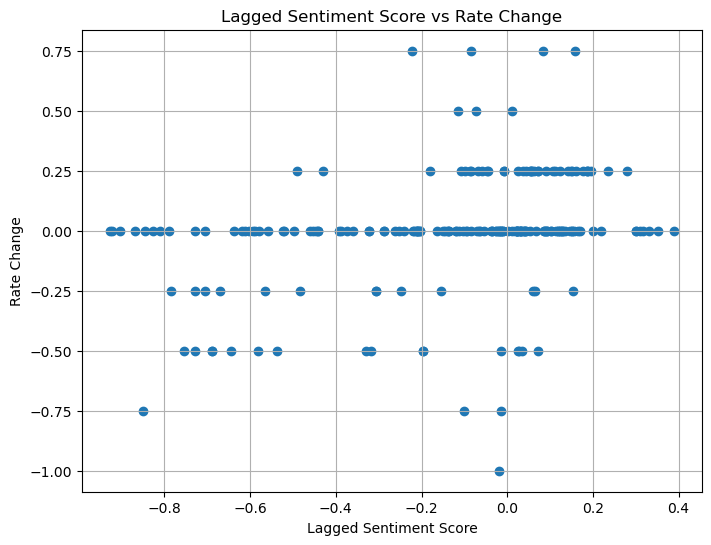

In [16]:
# 观察滞后情感得分与利率变动之间的关系

plt.figure(figsize=(8,6))
plt.scatter(df_merged['sentiment_lag1'], df_merged['rate_change'])
plt.title('Lagged Sentiment Score vs Rate Change')
plt.xlabel('Lagged Sentiment Score')
plt.ylabel('Rate Change')
plt.grid(True)
plt.show()
